In [ ]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.14.0
Notebook last run (end-to-end): 2023-12-05 04:29:43.490967


In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.01, random_state=42)

In [ ]:
X

array([[ 0.76628562,  0.21627572],
       [-0.77828546,  0.13782611],
       [-0.80092515,  0.12460507],
       ...,
       [-0.14557015, -0.79389048],
       [ 0.67981859, -0.74181293],
       [ 0.28369839,  0.96028934]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
import pandas as pd

circles = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1], 'label': y})
circles

,X0,X1,label
0,0.766286,0.216276,1
1,-0.778285,0.137826,1
2,-0.800925,0.124605,1
3,-0.358326,0.713535,1
4,0.438813,-0.898511,0
...,...,...,...
995,0.239017,0.962463,0
996,-0.971940,-0.256584,0
997,-0.145570,-0.793890,1
998,0.679819,-0.741813,0


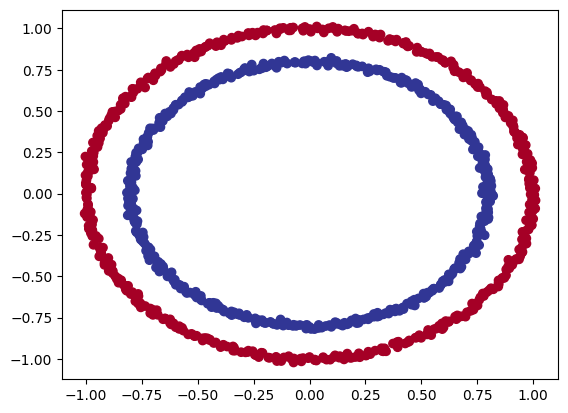

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X,y, epochs=5)
model.evaluate(X, y)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.1884 - accuracy: 0.4920
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.7609 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7274 - accuracy: 0.4940
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5040


[0.6946538686752319, 0.5040000081062317]

In [ ]:
# Train our model for longer (more chances to look at the data)
model.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831738471985, 0.5]

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

history = model_2.fit(X,y, epochs=200, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5000


[0.6944907307624817, 0.5]

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

history = model_3.fit(X,y, epochs=200, verbose=1)
model_3.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 2.3474 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.7285 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5000
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4630
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.4810
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4530
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.5140
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5160
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4780
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4520
Epoch 11/

[0.6933090686798096, 0.5]

In [ ]:
'''import numpy as np
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
xv'''

'import numpy as np\nnx, ny = (3, 2)\nx = np.linspace(0, 1, nx)\ny = np.linspace(0, 1, ny)\nxv, yv = np.meshgrid(x, y)\nxv'

In [ ]:
#yv

In [ ]:
#import matplotlib.pyplot as plt
#plt.plot(xv, yv, marker='o', color='k', linestyle='none')
#plt.show()

In [ ]:
#np.c_[np.array([1,2,3]), np.array([4,5,6])]

In [ ]:
#np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


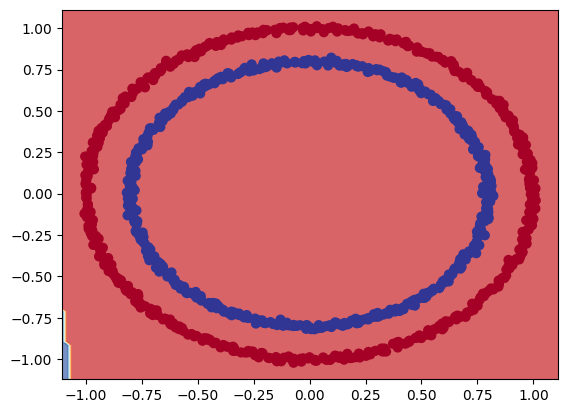

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
#model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            #y_reg_train,
            #epochs=100)

In [ ]:
#model_3.summary()

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 446.9195 - mae: 446.9195
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 354.6024 - mae: 354.6024
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 265.2778 - mae: 265.2778
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 172.1470 - mae: 172.1470
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 76.3816 - mae: 76.3816
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 61.0556 - mae: 61.0556
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 77.3115 - mae: 77.3115
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 59.0573 - mae: 59.0573
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 44.2434 - mae: 44.2434
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 50.7151 - mae: 50.7151
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 10ms/step


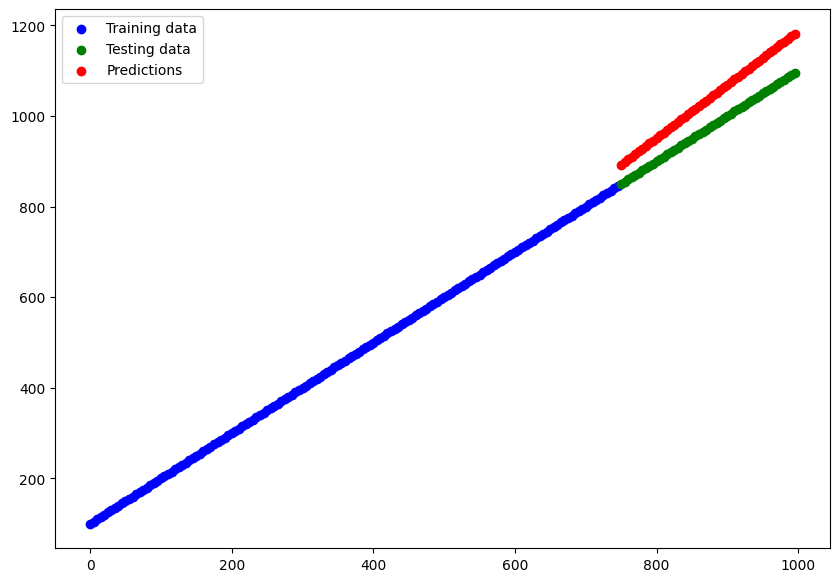

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear), # 1 hidden layer with linear activation
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # note: "lr" used to be what was used, now "learning_rate" is favoured
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2989 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2133 - accuracy: 0.4700
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1513 - accuracy: 0.4690
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0533 - accuracy: 0.4700
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9892 - accuracy: 0.4710
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9880 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9875 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9871 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9866 - accuracy: 0.4710
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9862 - accuracy: 0.4710
Epoch 11/

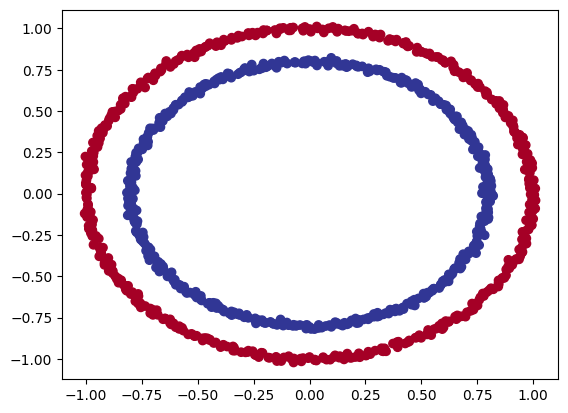

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


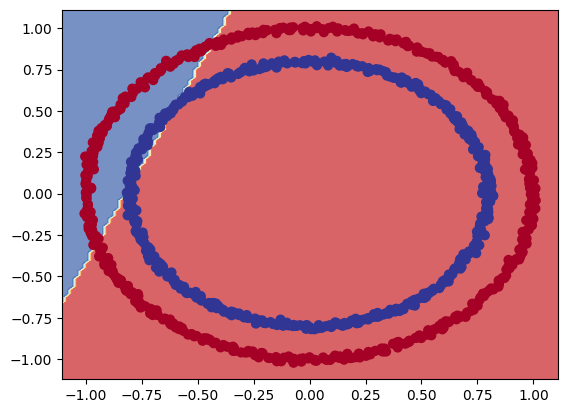

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_4, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.0480 - accuracy: 0.4680
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5610 - accuracy: 0.4670
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4564 - accuracy: 0.4640
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3918 - accuracy: 0.4670
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3412 - accuracy: 0.4640
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2994 - accuracy: 0.4610
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2652 - accuracy: 0.4630
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2345 - accuracy: 0.4620
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2078 - accuracy: 0.4610
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1831 - accuracy: 0.4600
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


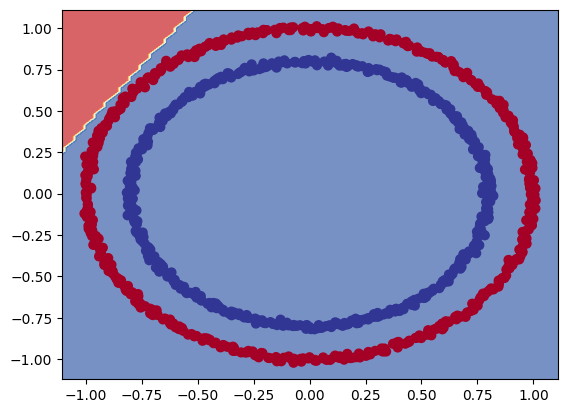

In [ ]:
# Check the deicison boundary (blue is blue class, yellow is the crossover, red is red class)
plot_decision_boundary(model_5, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.8356 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2943 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.8143 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6126 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.3565 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.0845 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8943 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.6311 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.2850 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5941 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7980


[0.5891435146331787, 0.7979999780654907]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


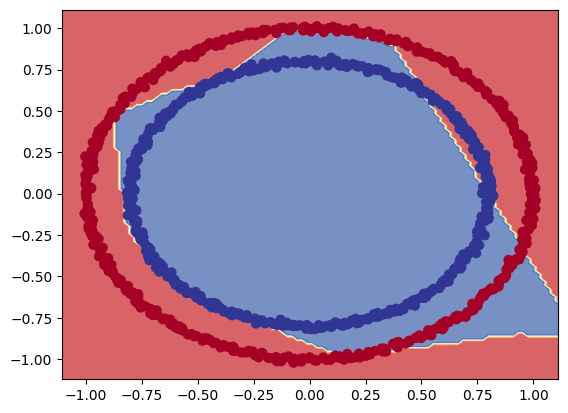

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.6330


[0.6217843890190125, 0.6330000162124634]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


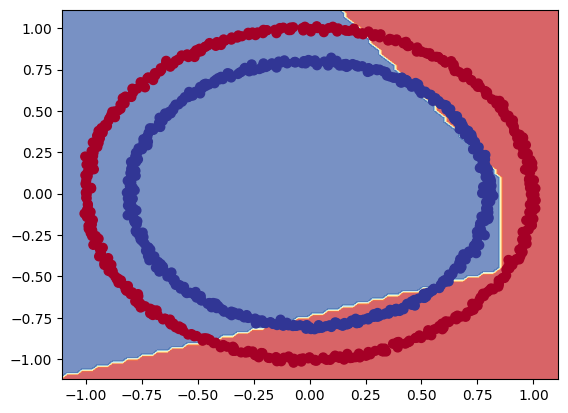

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_7, X, y)

In [ ]:
# How many examples are in the whole dataset?
len(X)

1000

In [ ]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6822 - accuracy: 0.5350
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.6263
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5863
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6913
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.6450
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6018 - accuracy: 0.7100
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5629 - accuracy: 0.8687
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5196 - accuracy: 0.8913
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4601 - accuracy: 0.9375
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.9725
Epoch 11/25
25/25 [

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.0393 - accuracy: 1.0000
Model loss on the test set: 0.03925994038581848
Model accuracy on the test set: 100.00%


313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


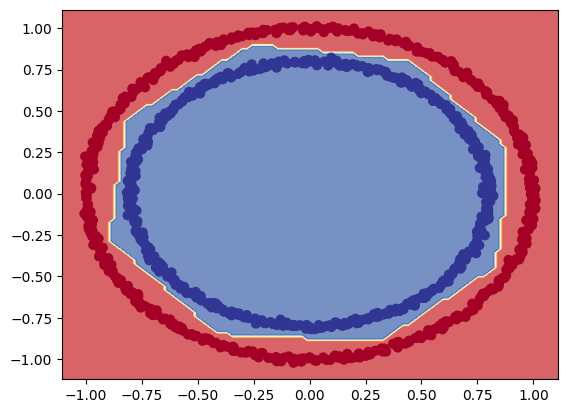

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_8, X, y)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 2ms/step
doing binary classifcation...


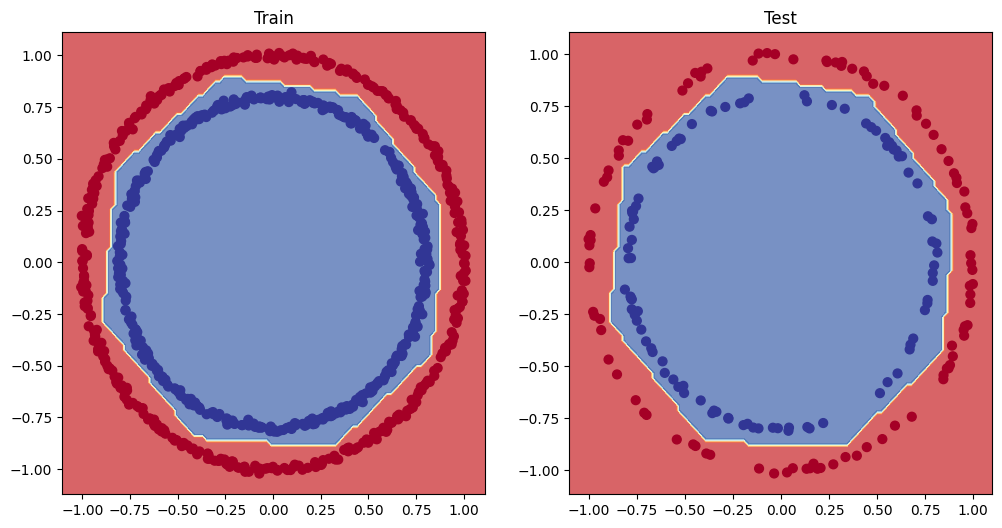

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [ ]:
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.682171,0.53500
1,0.673131,0.62625
2,0.662932,0.58625
3,0.649453,0.69125
4,0.631464,0.64500
5,0.601809,0.71000
6,0.562947,0.86875
7,0.519556,0.89125
8,0.460103,0.93750
9,0.386276,0.97250


Text(0.5, 1.0, 'Model_8 training curves')

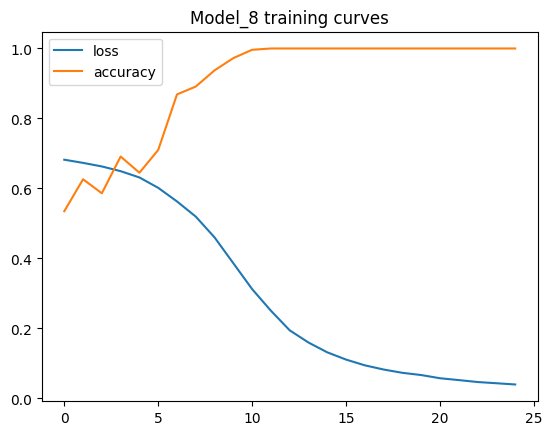

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.7078 - accuracy: 0.4700 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7073 - accuracy: 0.4800 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7069 - accuracy: 0.4825 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.4812 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7058 - accuracy: 0.4837 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7052 - accuracy: 0.4837 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.4850 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7039 - accuracy: 0.4837 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

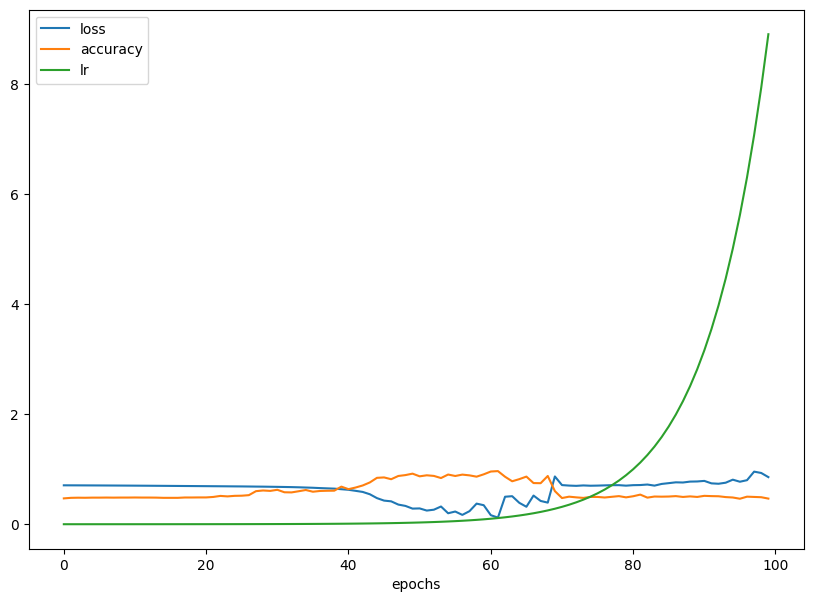

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

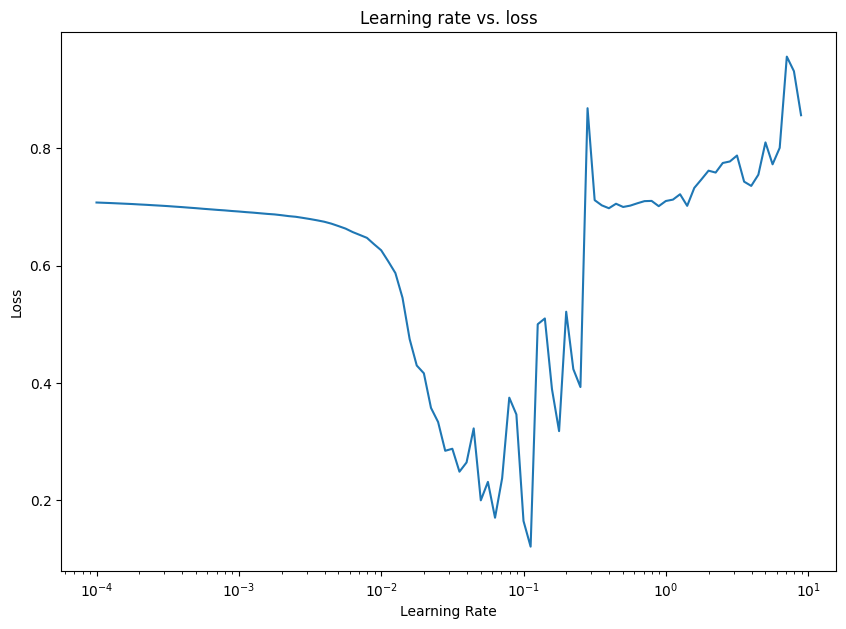

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), # to adjust the learning rate, you need to use tf.keras.optimizers.Adam (not "adam")
                metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 4ms/step - loss: 0.6872 - accuracy: 0.5163
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6740 - accuracy: 0.5863
Epoch 3/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.6825
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5899 - accuracy: 0.7675
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5109 - accuracy: 0.7900
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4017 - accuracy: 0.8988
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.9500
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2254 - accuracy: 0.9725
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1604 - accuracy: 0.9925
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1211 - accuracy: 0.9950
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0191 - accuracy: 1.0000


[0.019116446375846863, 1.0]

313/313 [==============================] - 2s 5ms/step
doing binary classifcation...
313/313 [==============================] - 3s 8ms/step
doing binary classifcation...


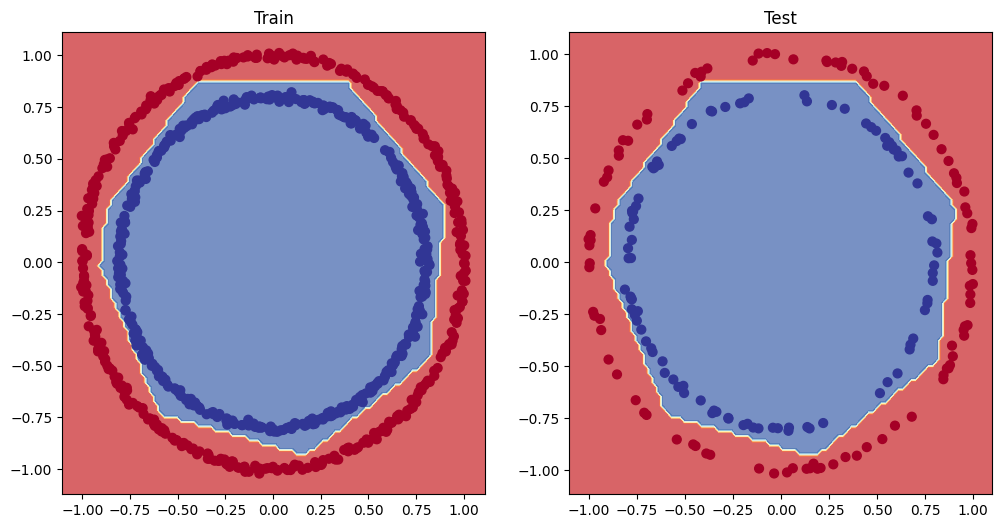

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()